### This was the logic implemented for seasons



In [30]:
def get_season(date):
    """
    Function to determine the season in Nepal based on the given date.
    Args:
        date (pd.Timestamp): A datetime object.
    Returns:
        str: The season corresponding to the date.
    """
    month = date.month
    day = date.day

    # Spring: Mid-March to Mid-May (blooming season, pre-monsoon)
    if (month == 3 and day >= 15) or (month == 4) or (month == 5 and day <= 15):
        return "Spring"  # 2 months 
    
    # Summer/Monsoon: 
    # - Early Summer (pre-monsoon heat): Mid-May to Mid-June
    # - Peak Monsoon: Mid-June to Mid-September
    elif (month == 5 and day > 15) or (month == 6 and day <= 15):
        return "Summer" # 1 month
    elif (month == 6 and day > 15) or (month == 7) or (month == 8) or (month == 9 and day <= 15):
        return "Monsoon" # 3 months
    
    # Autumn: Mid-September to Mid-November (post-monsoon, harvest season)
    elif (month == 9 and day > 15) or (month == 10) or (month == 11 and day <= 15):
        return "Autumn" # 2 months
    
    # Winter: Mid-November to Mid-March (cold, dry season)
    else: # ( month == 11 and day > 15 ) or ( month == 12 ) or ( month == 1 ) or ( month == 2 )or ( month == 3 and day <15 )
        return "Winter" # 4 months

In [31]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt
import seaborn as sns


# Not transformed data

In [32]:
df = pd.read_csv("cleaned_data/04-before-traansformation.csv")
df

,datetime,tempmax,tempmin,temp,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,...,precipitation,month_sin,month_cos,season_sin,season_cos,winddir_sin,winddir_cos,orographic_precipitation_potential,valley_temperature_inversion_index,urban_heat_island_effect_refined
0,2015-01-01,60.7,39.1,50.0,41.7,74.7,5.8,166.0,1020.4,79.1,...,0.80,0.5,0.87,-0.00,1.00,0.24,-0.97,104.82,0.02,8.53
1,2015-01-02,71.0,49.9,54.9,48.4,80.1,9.2,26.0,1022.2,93.3,...,0.00,0.5,0.87,-0.00,1.00,0.44,0.90,323.04,0.01,6.59
2,2015-01-03,67.7,48.1,54.8,50.5,86.3,15.7,304.8,1021.0,90.3,...,0.50,0.5,0.87,-0.00,1.00,-0.82,0.57,-1112.58,0.01,4.42
3,2015-01-04,69.9,48.1,54.5,49.6,85.5,9.2,252.4,1018.1,67.1,...,0.50,0.5,0.87,-0.00,1.00,-0.95,-0.30,-749.78,0.01,5.25
4,2015-01-05,64.3,42.7,51.3,45.7,83.2,10.3,213.3,1013.9,41.6,...,0.00,0.5,0.87,-0.00,1.00,-0.55,-0.84,-470.49,0.01,6.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,2025-06-26,84.1,71.5,76.7,71.6,85.9,11.4,220.1,1011.7,75.9,...,9.90,0.0,-1.00,-0.59,-0.81,-0.64,-0.76,-630.76,0.01,5.35
3464,2025-06-27,82.3,69.7,76.7,71.1,84.0,12.8,237.0,1010.3,80.1,...,18.80,0.0,-1.00,-0.59,-0.81,-0.84,-0.54,-901.74,0.01,5.81
3465,2025-06-28,82.3,71.5,76.1,70.5,84.3,11.4,278.3,1009.3,86.4,...,3.80,0.0,-1.00,-0.59,-0.81,-0.99,0.14,-950.95,0.01,5.75
3466,2025-06-29,82.3,71.5,73.5,71.4,94.2,16.1,223.2,1006.8,88.0,...,19.99,0.0,-1.00,-0.59,-0.81,-0.68,-0.73,-1038.20,0.00,2.23


In [33]:
len(df[df.precipitation == 0]) #zero inflated problem

2107

In [34]:
df['datetime'] =pd.to_datetime(df['datetime'])

In [35]:
df['season'] = df['datetime'].apply(get_season)

In [36]:
df.dtypes

datetime                              datetime64[ns]
tempmax                                      float64
tempmin                                      float64
temp                                         float64
dew                                          float64
humidity                                     float64
windspeed                                    float64
winddir                                      float64
sealevelpressure                             float64
cloudcover                                   float64
solarenergy                                  float64
precipitation                                float64
month_sin                                    float64
month_cos                                    float64
season_sin                                   float64
season_cos                                   float64
winddir_sin                                  float64
winddir_cos                                  float64
orographic_precipitation_potential           f

In [41]:
# dropping winter season
rain = df.copy(deep=True)
rain = rain[rain['season'] != "Winter"]

# Step 1: Spring filter
spring_mask = ((rain.datetime.dt.month == 4) |
               ((rain.datetime.dt.month == 5) & (rain.datetime.dt.day <= 15)))

# Step 2: Autumn filter
autumn_mask = (((rain.datetime.dt.month == 9) & (rain.datetime.dt.day > 15))
               |
               (rain.datetime.dt.month == 10))

# Step 3: Seasonal filter
summer_monsson_mask = rain['season'].isin(["Monsoon", "Summer(Pre-Monsoon)"])

# Step 4: Combine with date filter
rain = rain[spring_mask | autumn_mask | summer_monsson_mask]

print(f"Total days : {len(rain)}")
print(f"Rainy days : {len(rain[rain['precipitation'] != 0])}")
print(f"Dry days : {len(rain[rain['precipitation'] == 0])}")

Total days : 1707
Rainy days : 1026
Dry days : 681


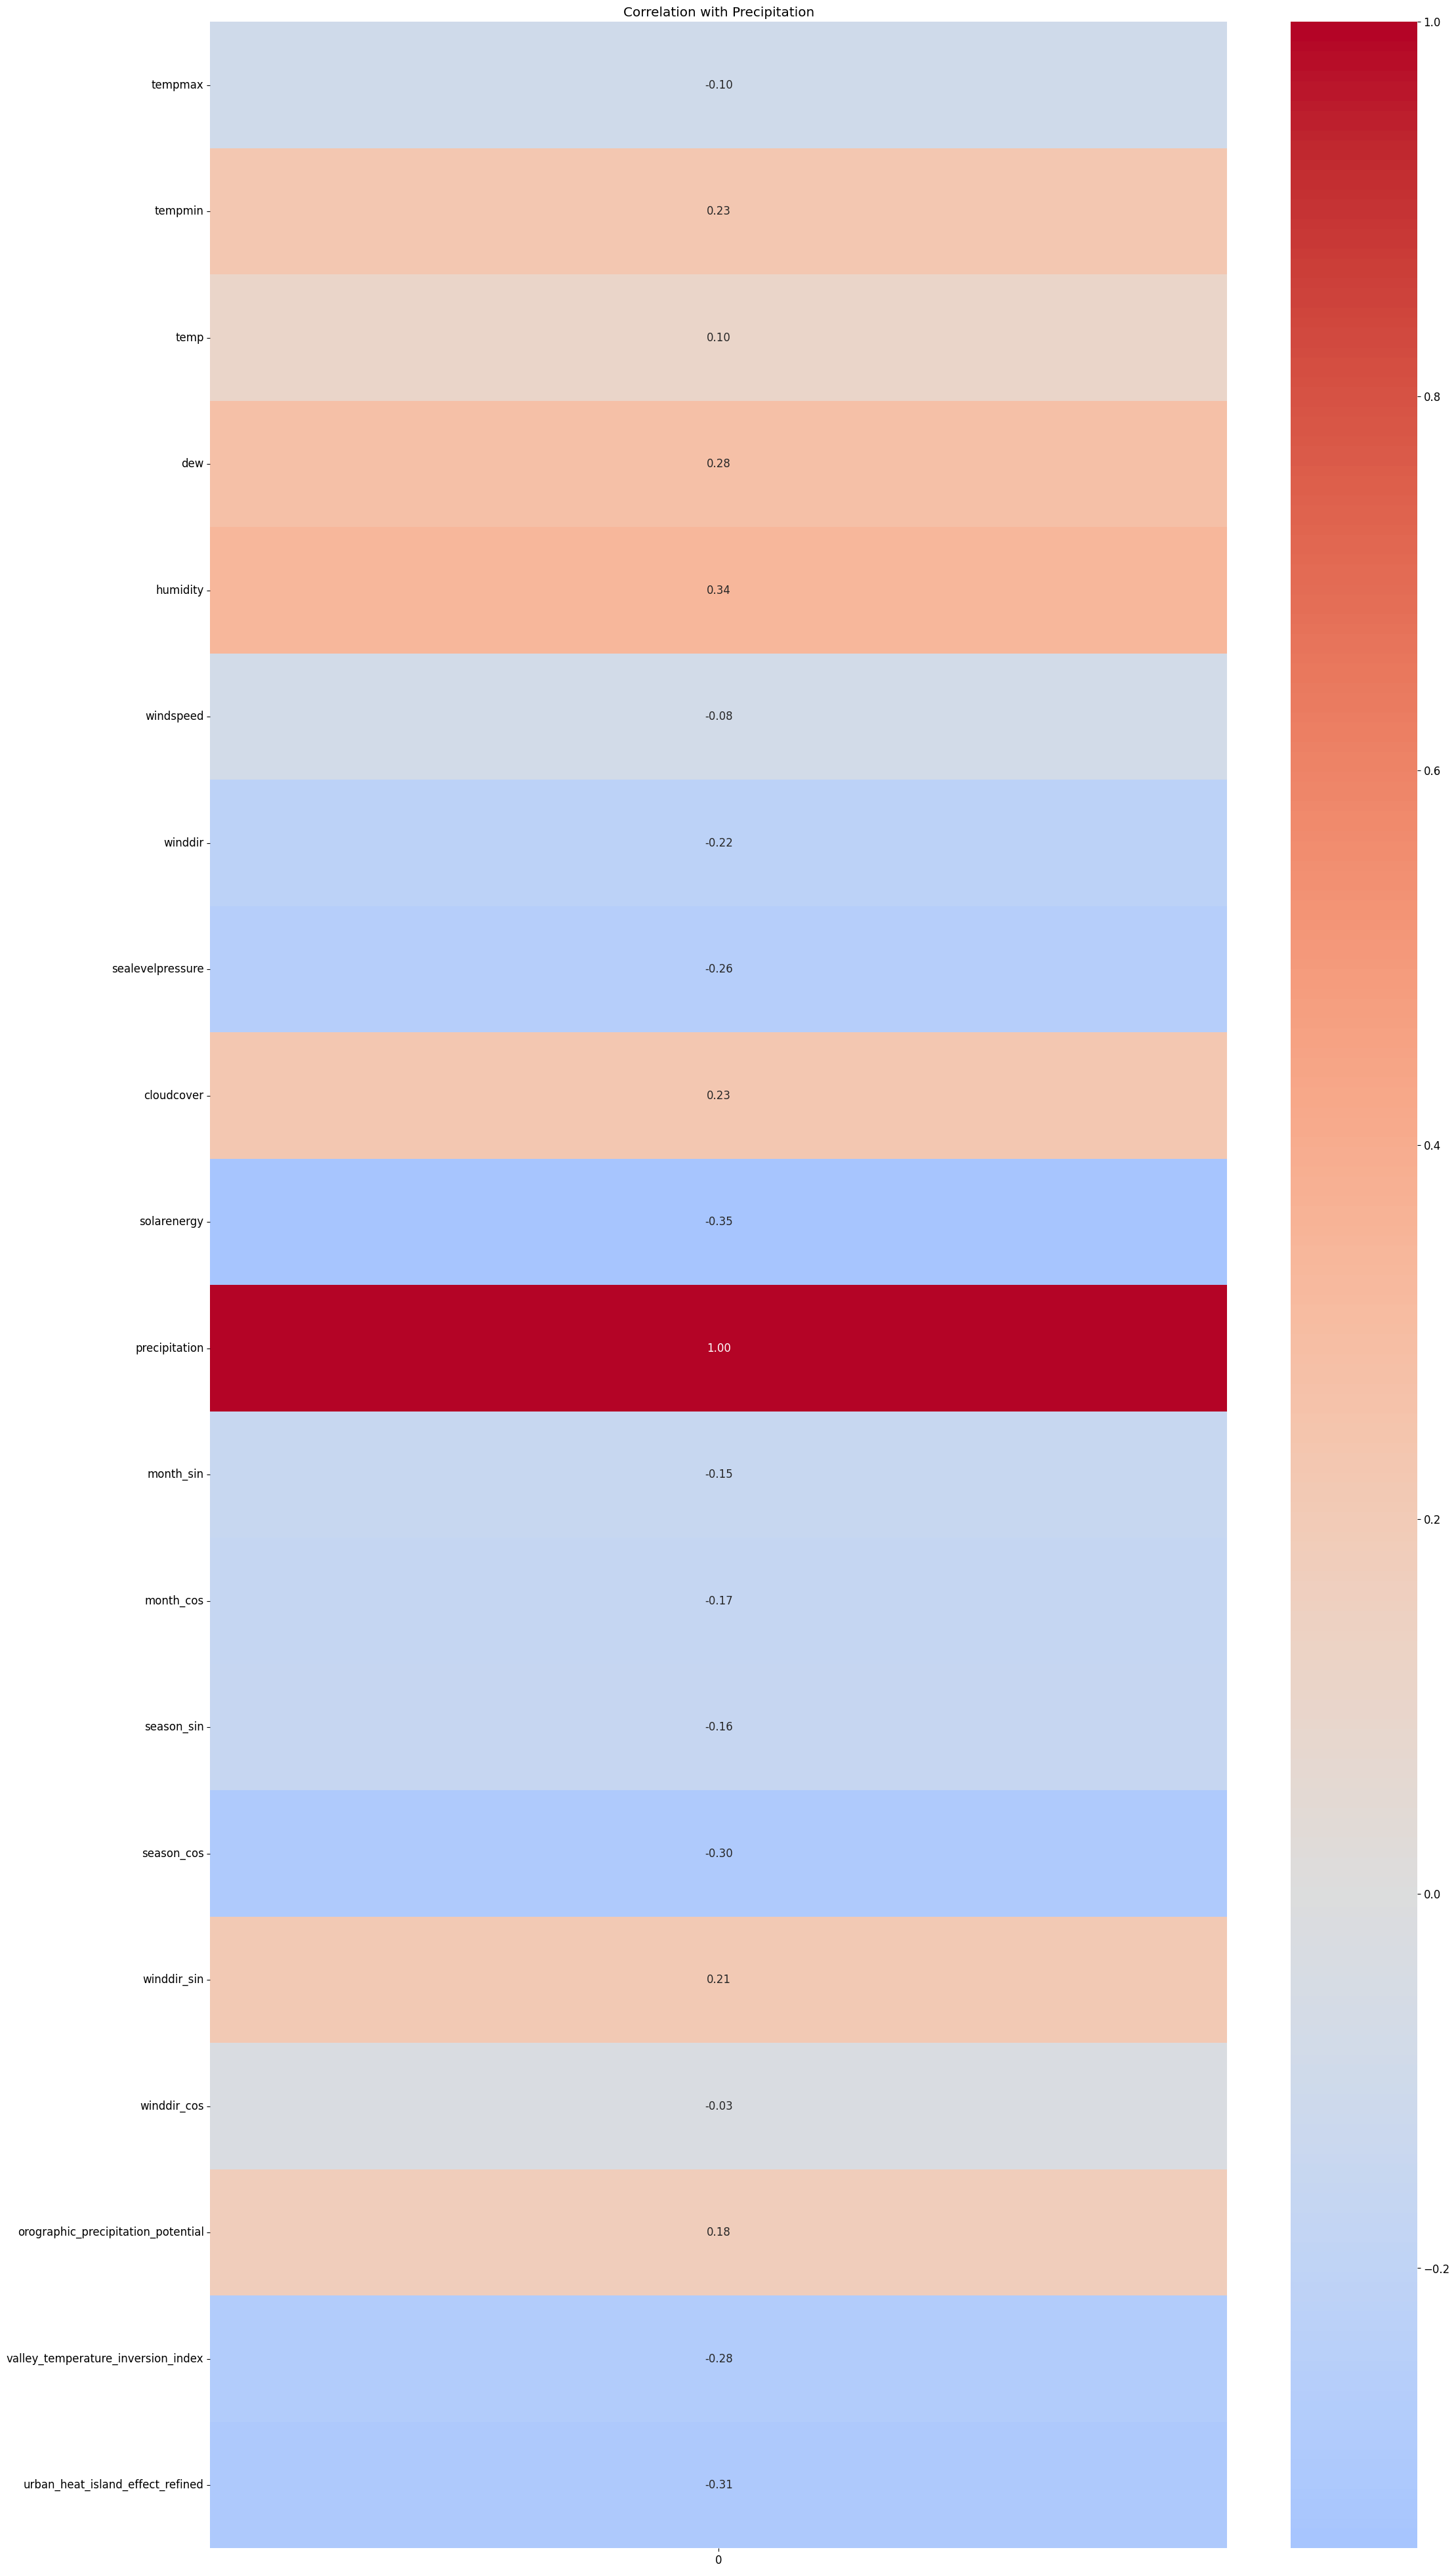

In [38]:
numeric_df = rain.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.rcParams.update({'font.size': 12})

# Compute correlation between 'precipitation' and other columns
precipitation_corr = numeric_df.corrwith(numeric_df["precipitation"])

# Convert to DataFrame for heatmap
precipitation_corr_df = precipitation_corr.to_frame()

# Plot
plt.figure(figsize=(25, 50))
sns.heatmap(precipitation_corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation with Precipitation")
plt.savefig("cleaned_data/03-interaction_features-visualizations/rainy days/Pearson Correlation Matrix (Numeric Features).png")
plt.show()

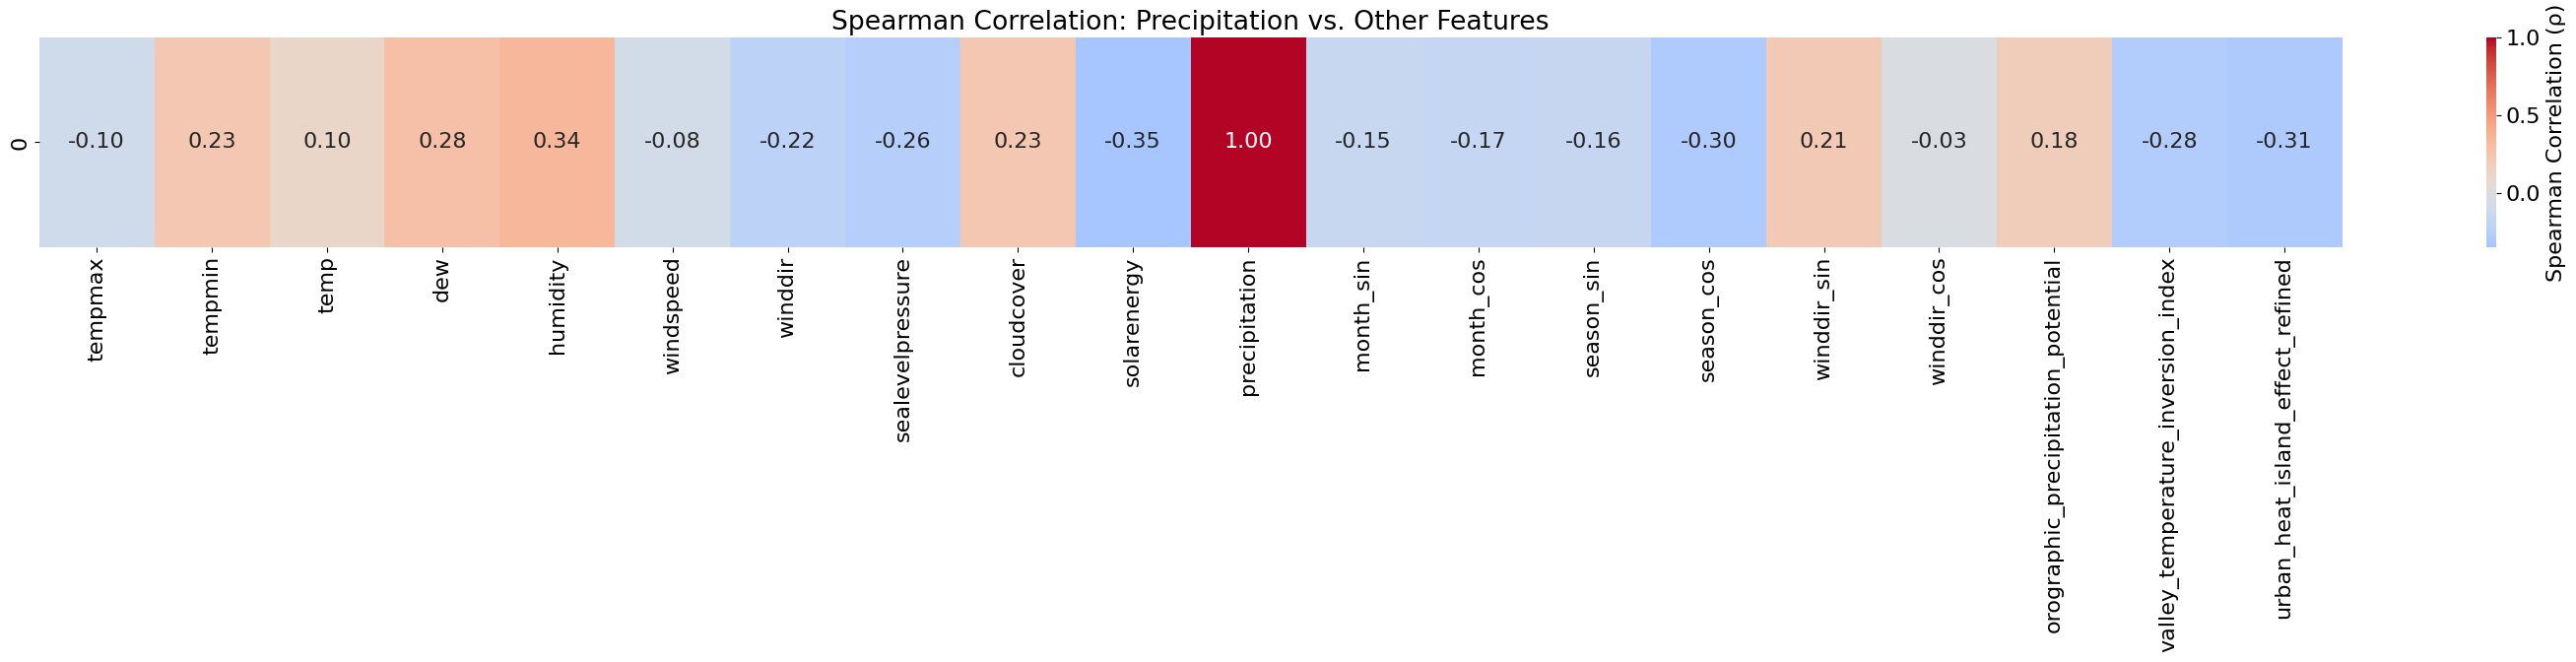

In [39]:
# Reshape correlations for heatmap
precipitation_corr_df = precipitation_corr.to_frame().T  # 1 row × N columns
plt.rcParams.update({'font.size': 16})

# Plot
plt.figure(figsize=(30, 7))  # Wide and short
sns.heatmap(
    precipitation_corr_df, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,
    cbar_kws={"label": "Spearman Correlation (ρ)"}
)
plt.title("Spearman Correlation: Precipitation vs. Other Features")
plt.tight_layout()
plt.savefig("cleaned_data/03-interaction_features-visualizations/rainy days/correlation heatmapSpearman_Correlation_Heatmap.png")
plt.show()

In [40]:
rain.to_csv("cleaned_data/06-season-masking-on-not-transformed-data.csv", index=False)

#  transformed data

In [13]:
df = pd.read_csv("cleaned_data/04-after-yeojohsnson-traansformation.csv")

df['datetime'] =pd.to_datetime(df['datetime'])
df['season'] = df['datetime'].apply(get_season)

In [14]:
# dropping winter season
rain = df.copy(deep=True)
rain = rain[rain['season'] != "Winter"]

# Step 1: Spring filter
spring_mask = ((rain.datetime.dt.month == 4) |
               ((rain.datetime.dt.month == 5) & (rain.datetime.dt.day <= 15)))

# Step 2: Autumn filter
autumn_mask = (((rain.datetime.dt.month == 9) & (rain.datetime.dt.day > 15))
               |
               (rain.datetime.dt.month == 10))

# Step 3: Seasonal filter
summer_monsson_mask = rain['season'].isin(["Monsoon", "Summer(Pre-Monsoon)"])

# Step 4: Combine with date filter
rain = rain[spring_mask | autumn_mask | summer_monsson_mask]

rain.to_csv("cleaned_data/06-season-masking-on-transformed-data.csv",index=False)
print(f"Total days : {len(rain)}")
print(f"Rainy days : {len(rain[rain['precipitation'] != 0])}")
print(f"Dry days : {len(rain[rain['precipitation'] == 0])}")

Total days : 1923
Rainy days : 1923
Dry days : 0


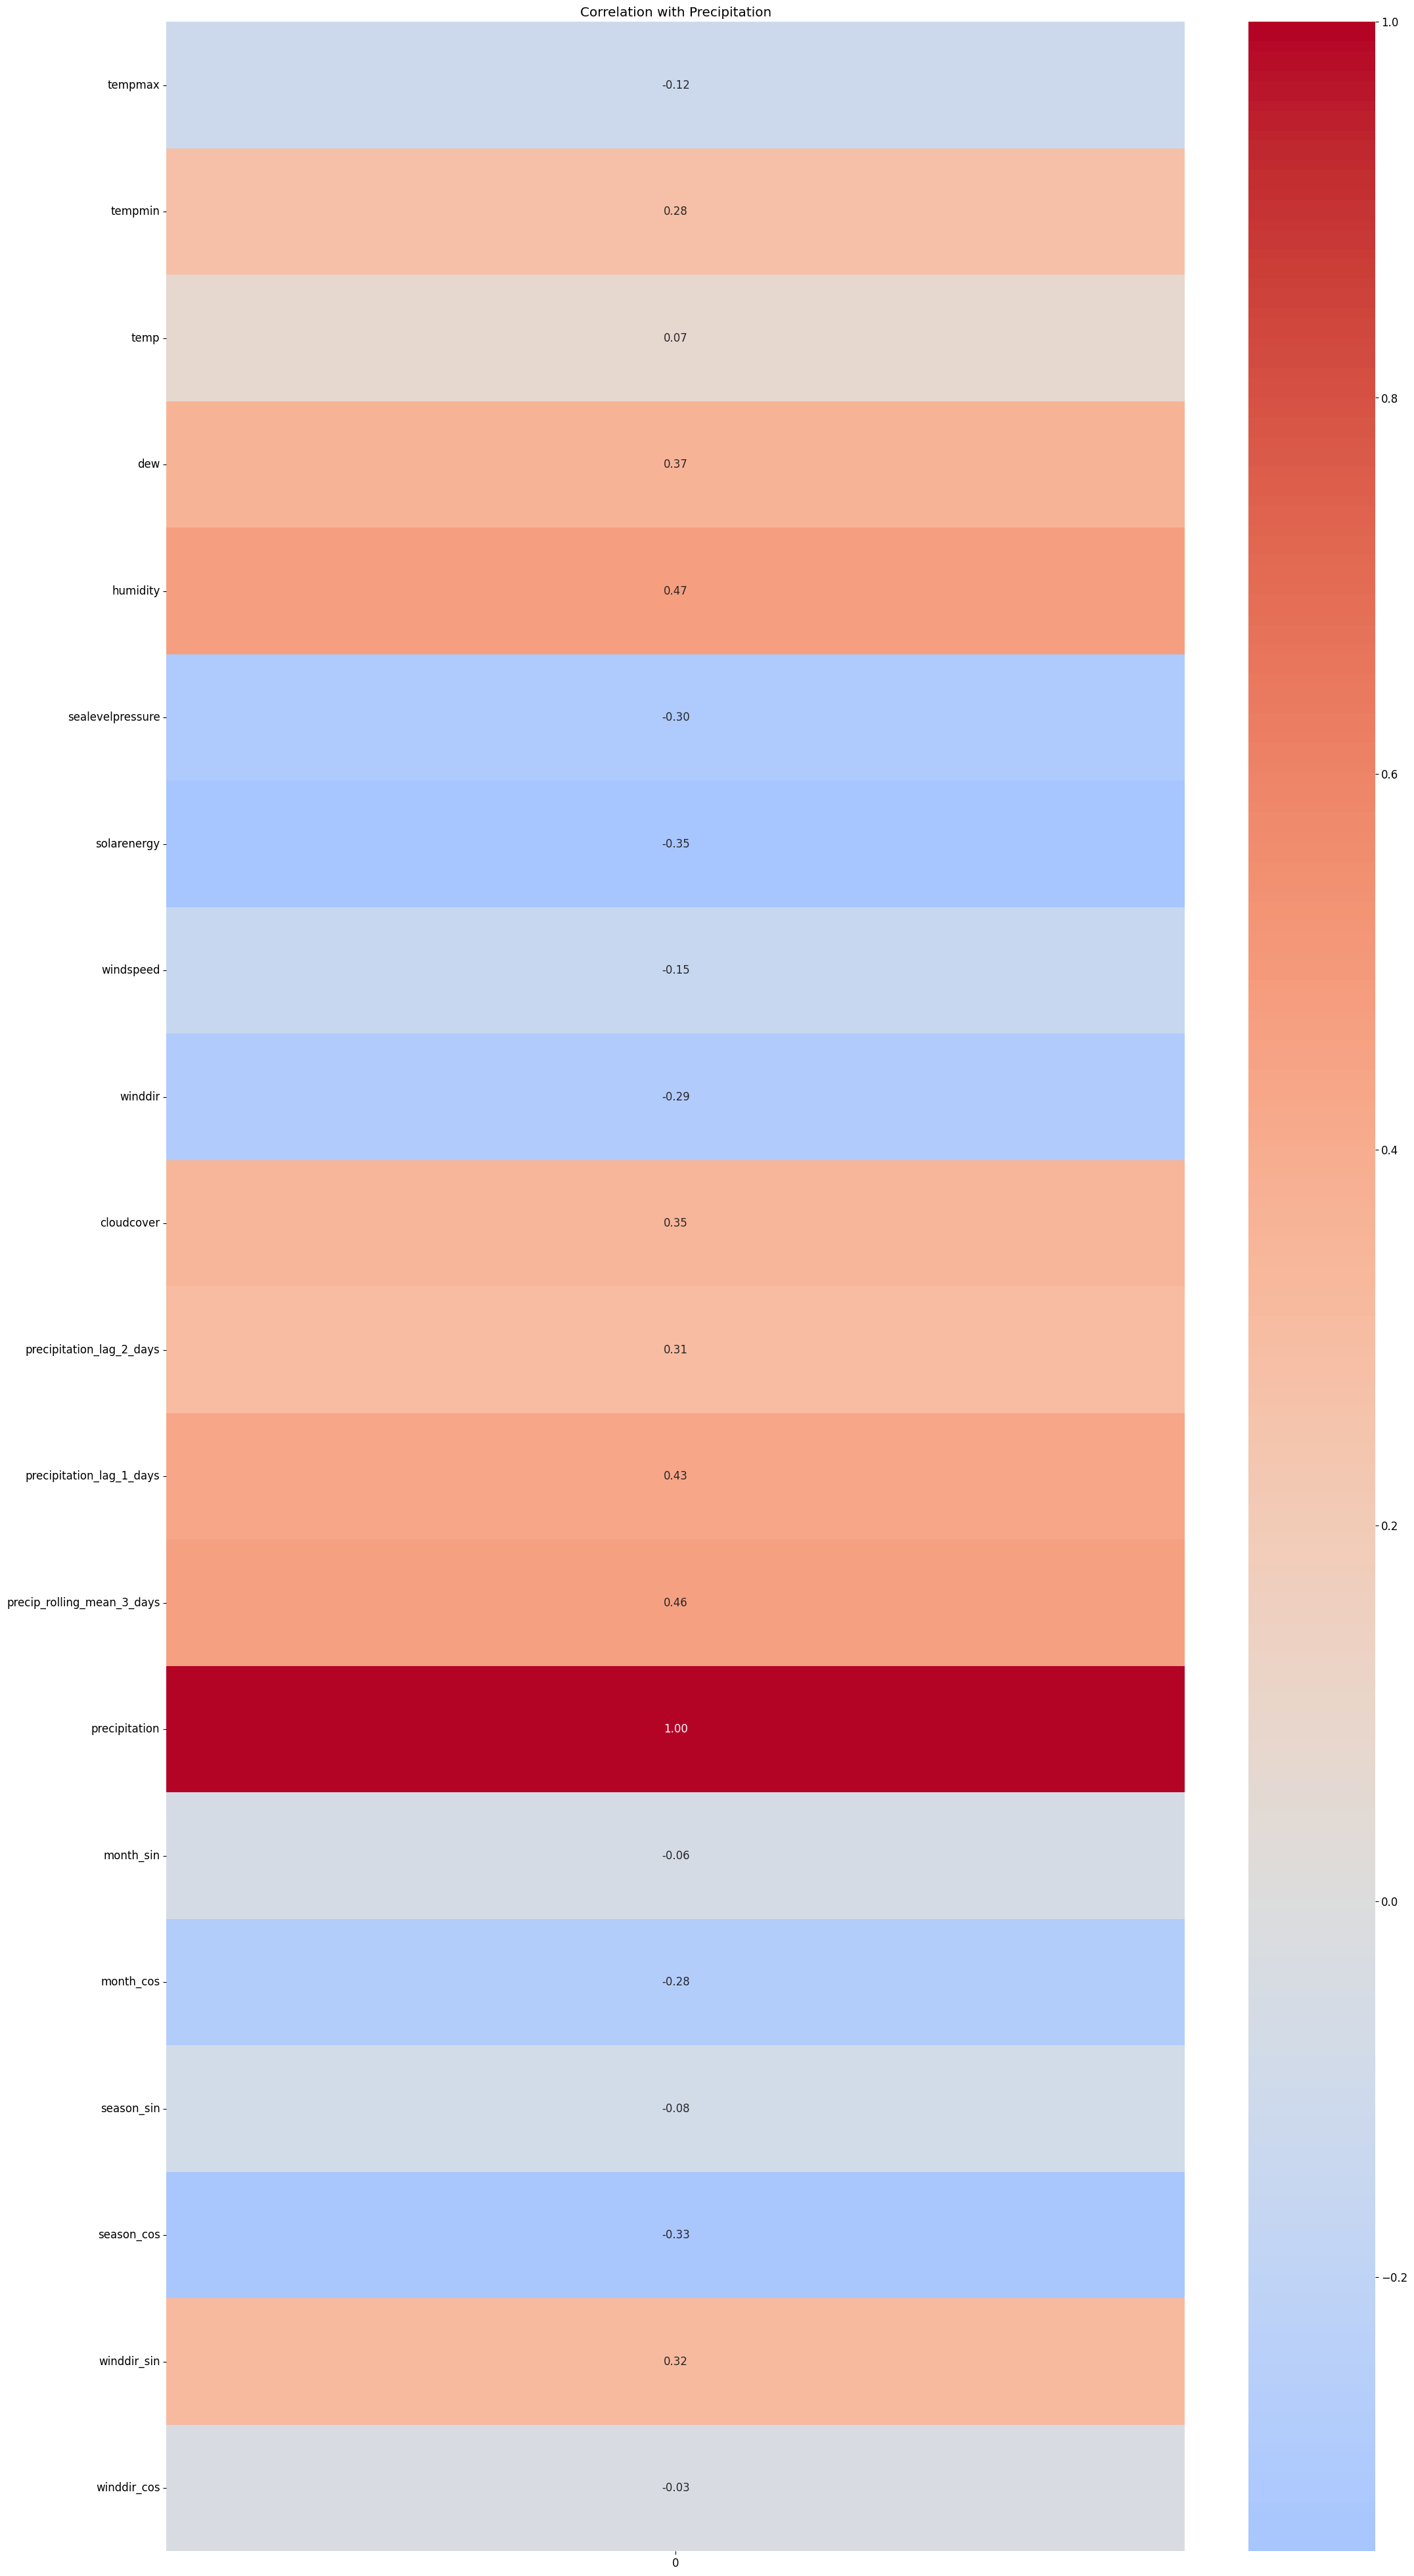

In [15]:
numeric_df = rain.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.rcParams.update({'font.size': 12})

# Compute correlation between 'precipitation' and other columns
precipitation_corr = numeric_df.corrwith(numeric_df["precipitation"])

# Convert to DataFrame for heatmap
precipitation_corr_df = precipitation_corr.to_frame()

# Plot
plt.figure(figsize=(25, 50))
sns.heatmap(precipitation_corr_df, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation with Precipitation")
plt.savefig("cleaned_data/03-interaction_features-visualizations/rainy days/Pearson Correlation Matrix (Numeric Features).png")
plt.show()

In [17]:
rain.to_csv("cleaned_data/06-season-masking-on-transformed-data.csv",index=False)

### Apply transformation for log trnasform (right skewed) and exponential trnasform (left skewed)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew

In [46]:
df = pd.read_csv('cleaned_data/06-season-masking-on-not-transformed-data.csv')

df =df.drop(columns=["temp","dew","humidity","windspeed","winddir",
                 "solarenergy","month_sin","month_cos",
                 "winddir_sin","winddir_cos",
                 "orographic_precipitation_potential",
                 "valley_temperature_inversion_index","urban_heat_island_effect_refined"])
df_copy =df.copy(deep=True)

In [47]:
numeric_df  =pd.DataFrame(df_copy.select_dtypes(include=['int', 'float']))
skewness = numeric_df.apply(skew)
print("Skewness of Features:\n", skewness)

Skewness of Features:
 tempmax            -0.424159
tempmin            -0.839499
sealevelpressure    0.087242
cloudcover          0.040682
precipitation       3.981414
season_sin          0.939341
season_cos         -0.024606
dtype: float64


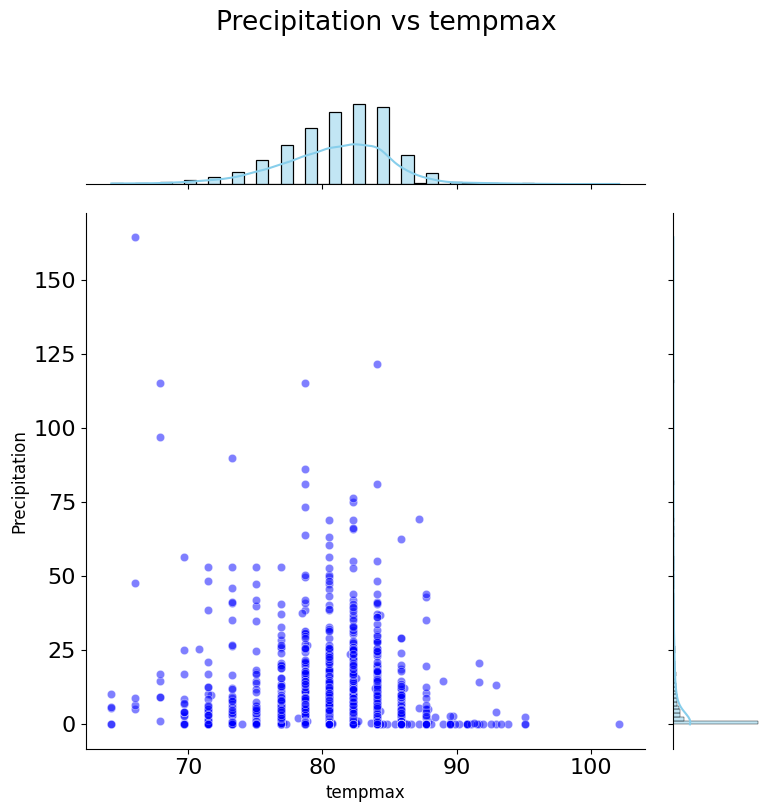

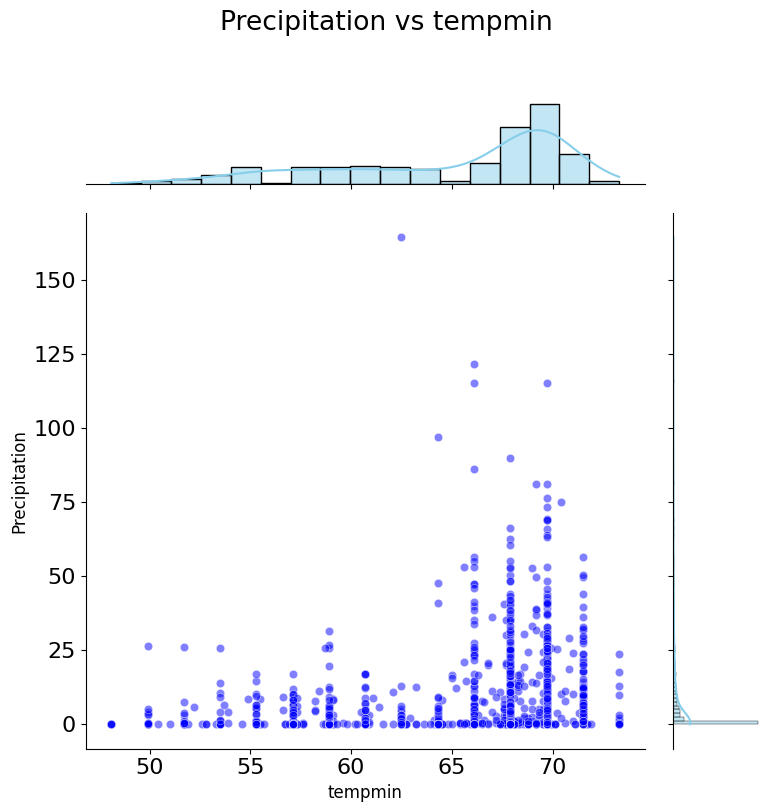

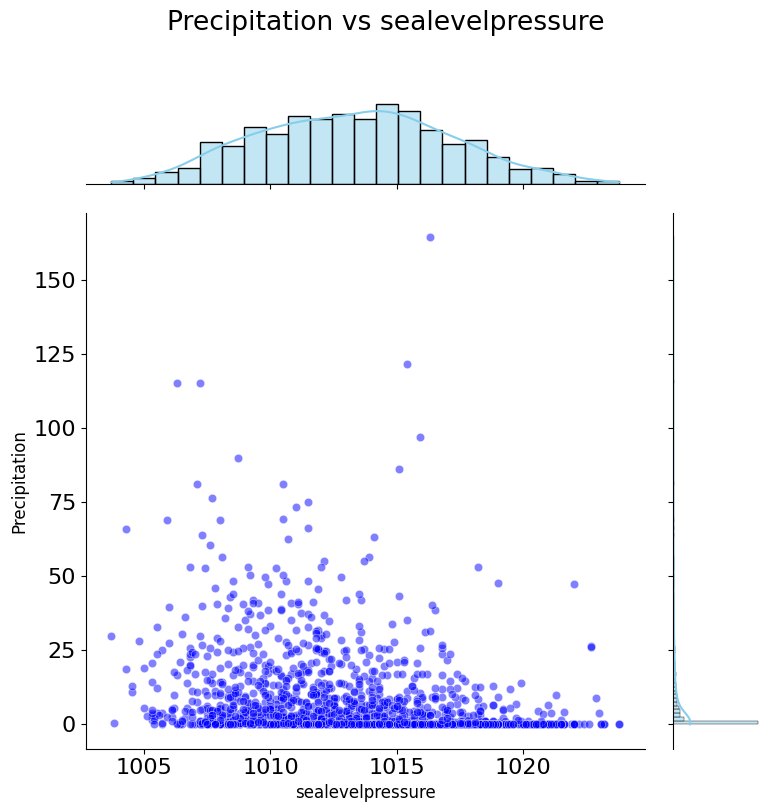

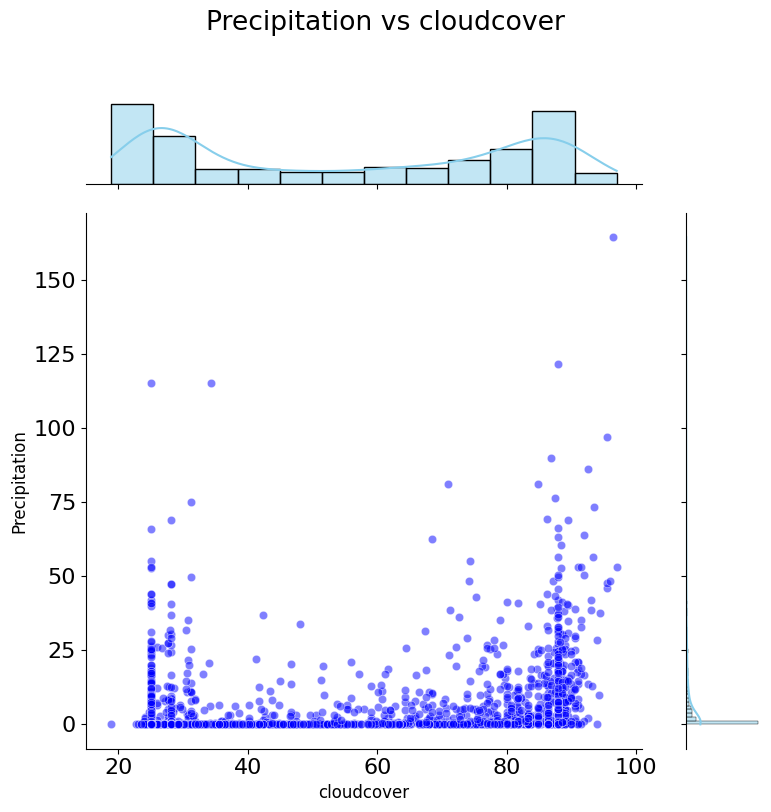

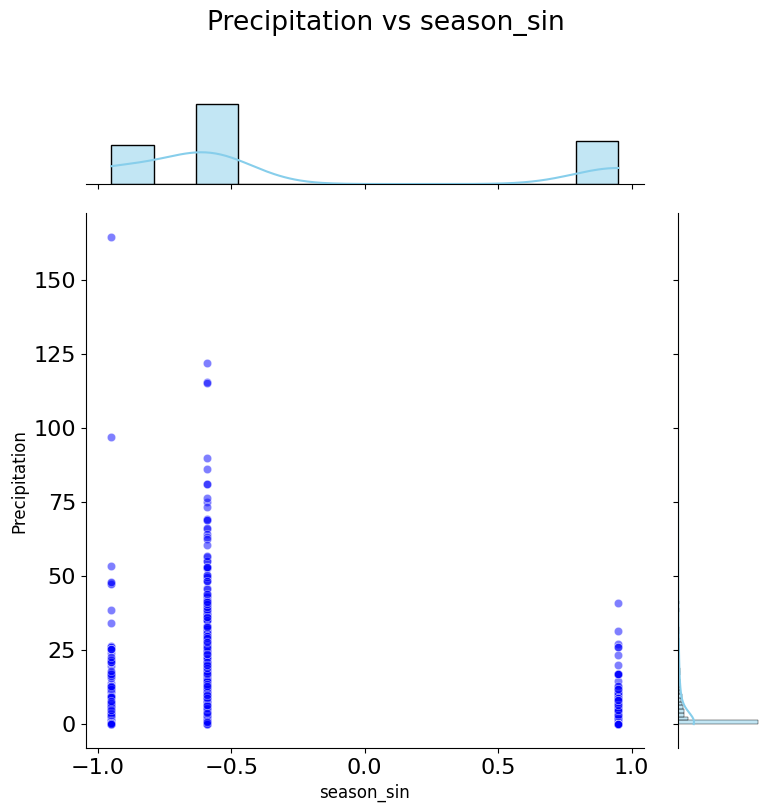

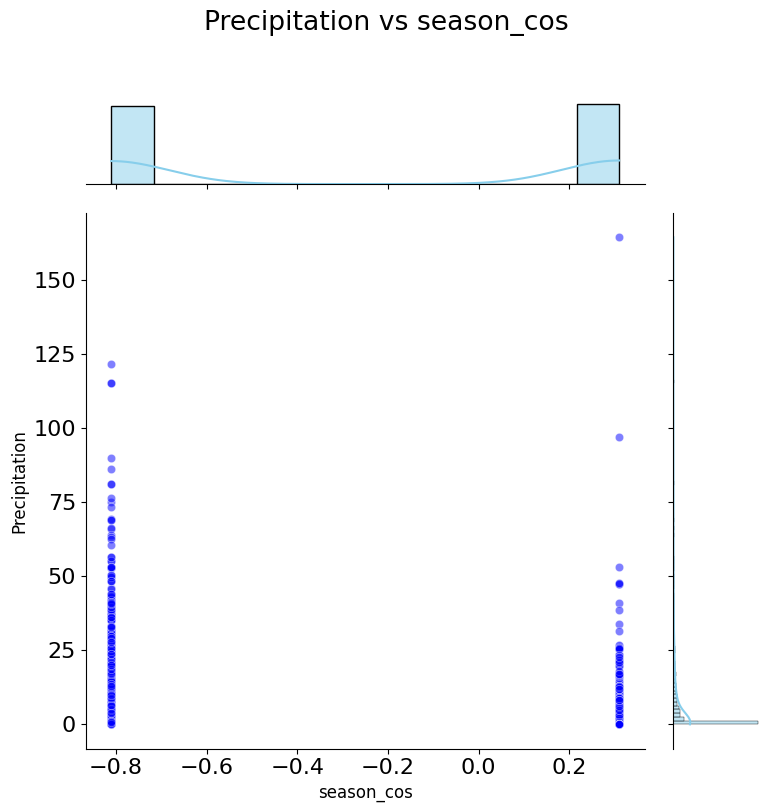

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric features (exclude target if needed)
numeric_features = df_copy.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'precipitation' in numeric_features:
    numeric_features.remove('precipitation')

# Create joint plots for each numeric feature
for feature in numeric_features:
    g = sns.JointGrid(data=df_copy, x=feature, y='precipitation', height=8)
    g.plot_joint(sns.scatterplot, alpha=0.5, color='blue')  # Scatter plot
    g.plot_marginals(sns.histplot, kde=True, color='skyblue')  # Histograms
    g.set_axis_labels(feature, 'Precipitation', fontsize=12)
    plt.suptitle(f"Precipitation vs {feature}", y=1.02)
    plt.tight_layout()
    plt.show()

In [49]:
import numpy as np